<a href="https://colab.research.google.com/github/Kryptonite778/kepler-20e-analysis/blob/main/Kepler_20_e_(Project_Code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Kepler-37b (Lightkurve workflow)


In [ ]:
Aiman SHEIKH

In [ ]:
!pip install lightkurve

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 586.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.6/199.6 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 82.7 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=0f30496e3b9234e33001f6f81dc4ff458589abea5d1c8b326e988fa559f6c425
  Stored in directory: /root/.cache/pip/wheels/04/15/cd/2f622795b09e83471a3be5d2581cd9cf96a6ec7aa78e8deffe
  Created wheel for memoization

In [ ]:
%matplotlib inline
import lightkurve as lk
import numpy as np
tpf = lk.search_targetpixelfile("Kepler-20 e", author="Kepler", quarter=3, cadence="long").download()

/usr/local/lib/python3.12/dist-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


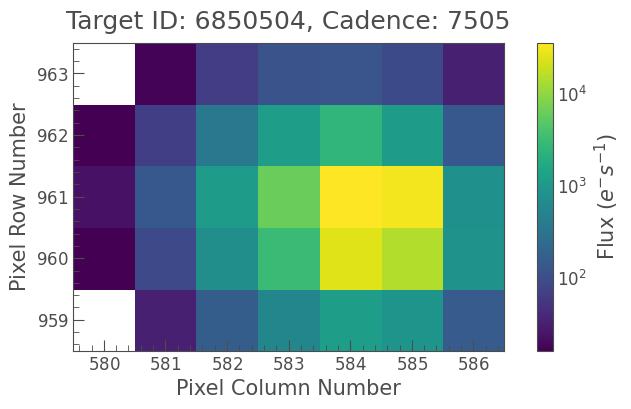

In [ ]:
tpf.plot(frame=100, scale='log', show_colorbar=True);

In [ ]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

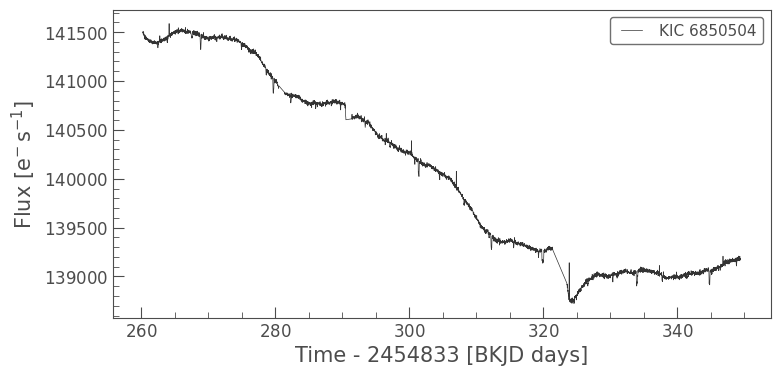

In [ ]:
lc.plot();

In [ ]:
flat, trend = lc.flatten(window_length=301, return_trend=True)

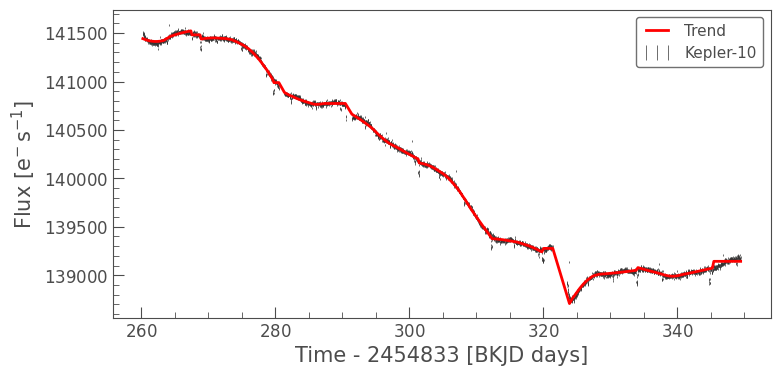

In [ ]:
ax = lc.errorbar(label="Kepler-10")                   # plot() returns a matplotlib axes ...
trend.plot(ax=ax, color='red', lw=2, label='Trend');  # which we can pass to the next plot() to use the same axes

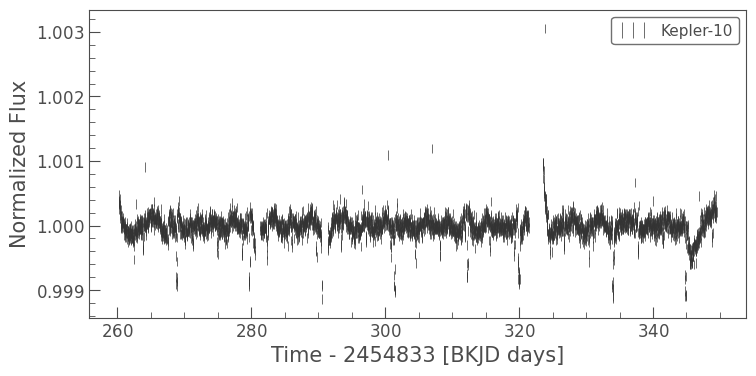

In [ ]:
flat.errorbar(label="Kepler-10");

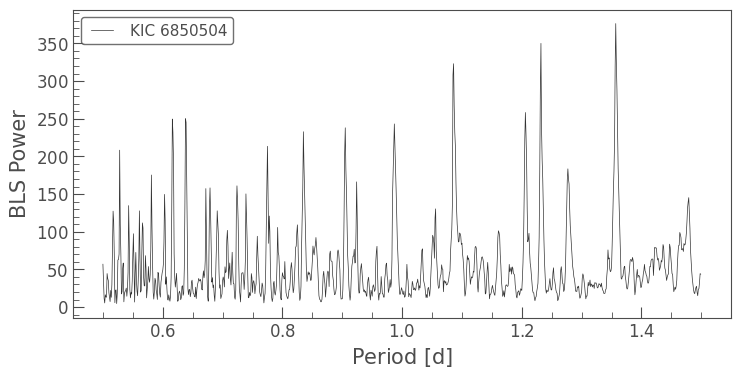

In [ ]:
periodogram = flat.to_periodogram(method="bls", period=np.arange(0.5, 1.5, 0.001))
periodogram.plot();

In [ ]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 1.357 d


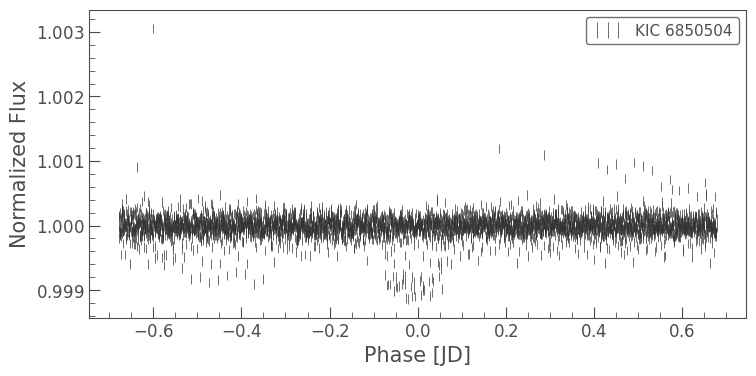

In [ ]:
flat.fold(period=best_fit_period, epoch_time=periodogram.transit_time_at_max_power).errorbar();

## 3.1 1st

In [ ]:
%matplotlib inline
import lightkurve as lk

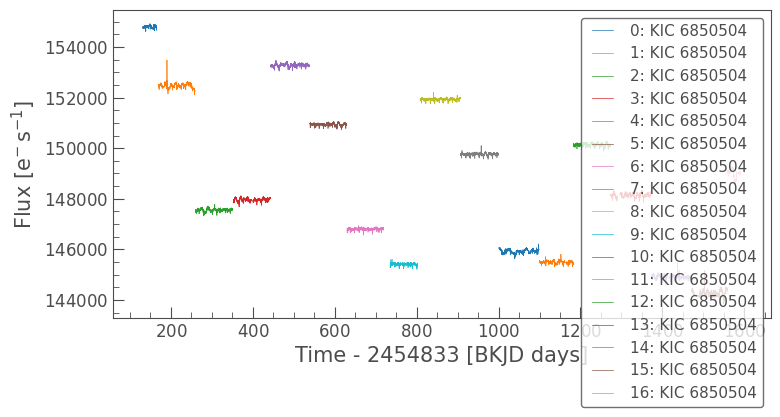

In [ ]:
# Search for Kepler observations of Kepler-69
search_result = lk.search_lightcurve('Kepler-20 e', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot();

In [ ]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr006850504,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr006850504,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr006850504,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr006850504,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr006850504,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr006850504,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr006850504,0.0
7,Kepler Quarter 10,2011,Kepler,1800,kplr006850504,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr006850504,0.0


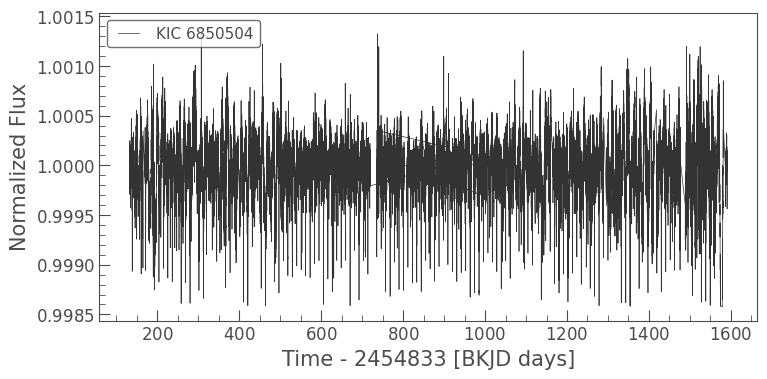

In [ ]:
# Flatten the light curve
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();

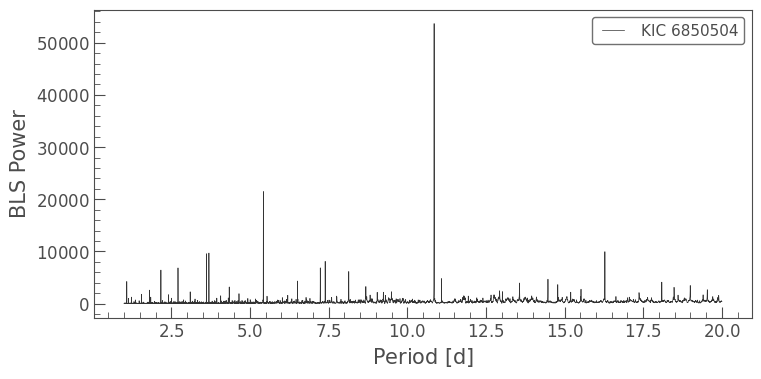

In [ ]:
import numpy as np
# Create array of periods to search
period = np.linspace(1, 20, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

In [ ]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
planet_b_period

<Quantity 10.85438544 d>

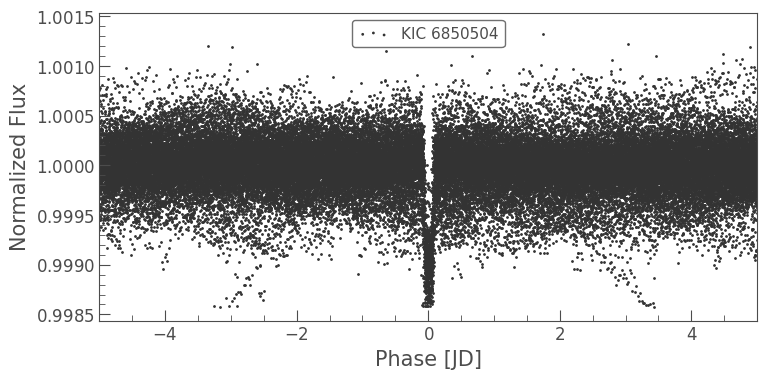

In [ ]:
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-5, 5);

In [ ]:
# Create a cadence mask using the BLS parameters
planet_b_mask = bls.get_transit_mask(period=planet_b_period,
                                     transit_time=planet_b_t0,
                                     duration=planet_b_dur)

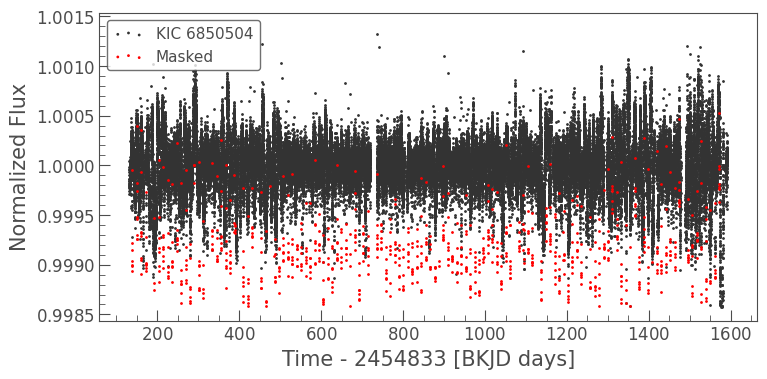

In [ ]:
masked_lc = lc[~planet_b_mask]
ax = masked_lc.scatter();
lc[planet_b_mask].scatter(ax=ax, c='r', label='Masked');

In [ ]:
# Create a BLS model using the BLS parameters
planet_b_model = bls.get_transit_model(period=planet_b_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)

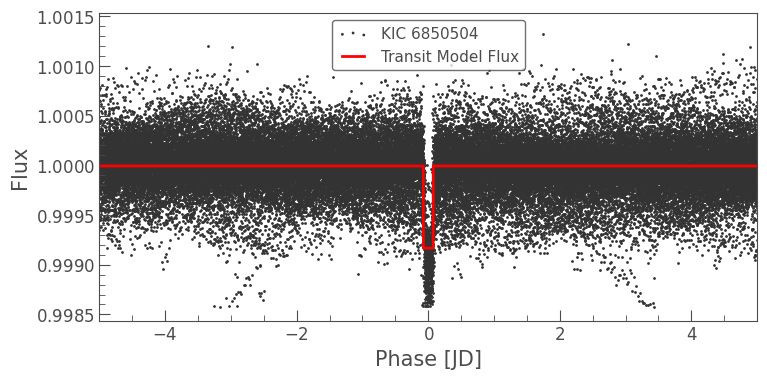

In [ ]:
ax = lc.fold(planet_b_period, planet_b_t0).scatter()
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-5, 5);

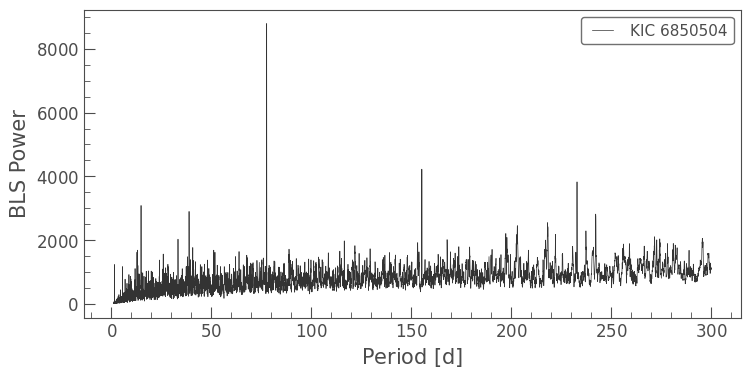

In [ ]:
period = np.linspace(1, 300, 10000)
bls = masked_lc.to_periodogram('bls', period=period, frequency_factor=500)
bls.plot();

In [ ]:
planet_c_period = bls.period_at_max_power
planet_c_t0 = bls.transit_time_at_max_power
planet_c_dur = bls.duration_at_max_power

# Check the value for period
planet_c_period

<Quantity 77.61146115 d>

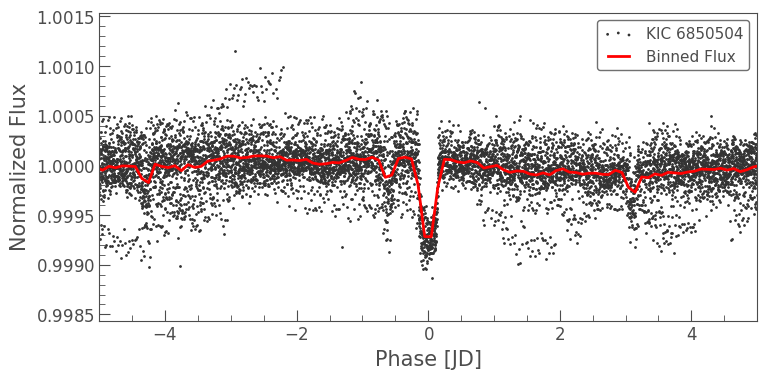

In [ ]:
ax = masked_lc.fold(planet_c_period, planet_c_t0).scatter()
masked_lc.fold(planet_c_period, planet_c_t0).bin(.1).plot(ax=ax, c='r', lw=2,
                                                          label='Binned Flux')
ax.set_xlim(-5, 5);

In [ ]:
planet_c_model = bls.get_transit_model(period=planet_c_period,
                                       transit_time=planet_c_t0,
                                       duration=planet_c_dur)

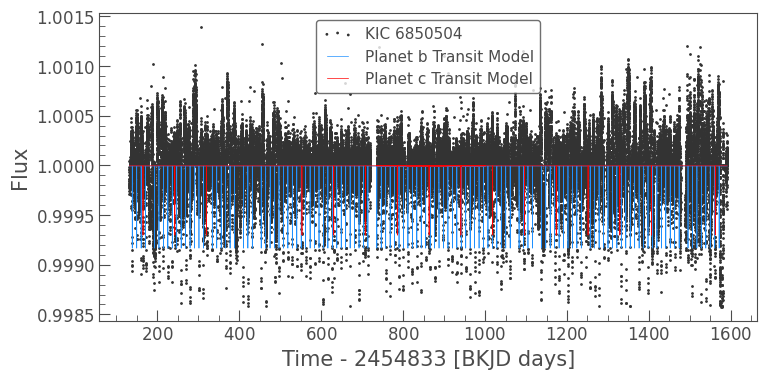

In [ ]:
ax = lc.scatter();
planet_b_model.plot(ax=ax, c='dodgerblue', label='Planet b Transit Model');
planet_c_model.plot(ax=ax, c='r', label='Planet c Transit Model');

In [ ]:
lk.show_citation_instructions()

##3.1 River plotting

In [ ]:
%matplotlib inline
import lightkurve as lk
import numpy as np

In [ ]:
lc = lk.search_lightcurve('KIC 6850504', author='Kepler', cadence='long').download_all().stitch()

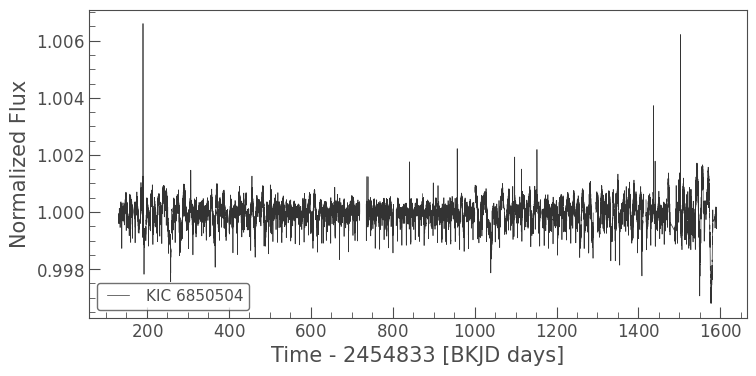

In [ ]:
lc.plot();

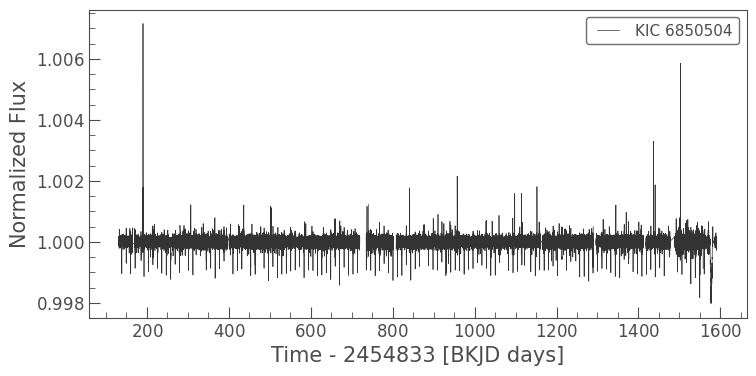

In [ ]:
clc = lc.flatten(21)
clc.plot();

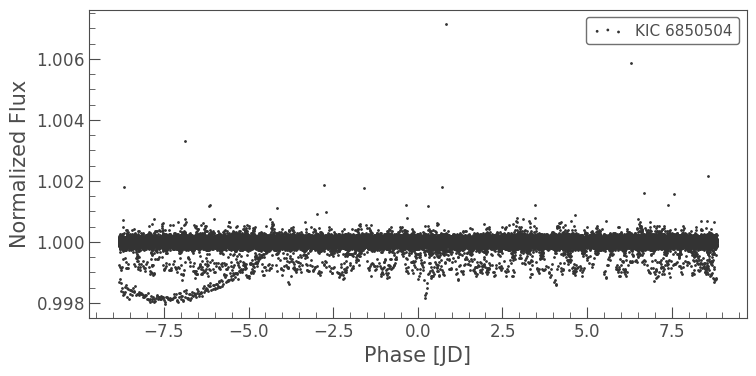

In [ ]:
# Period (p) and and reference transit time (t0) are taken from the NASA Exoplanet Archive
p, t0 = 17.660114, 136.57258
folded_lc = clc.fold(period=p, epoch_time=t0)
folded_lc.scatter();

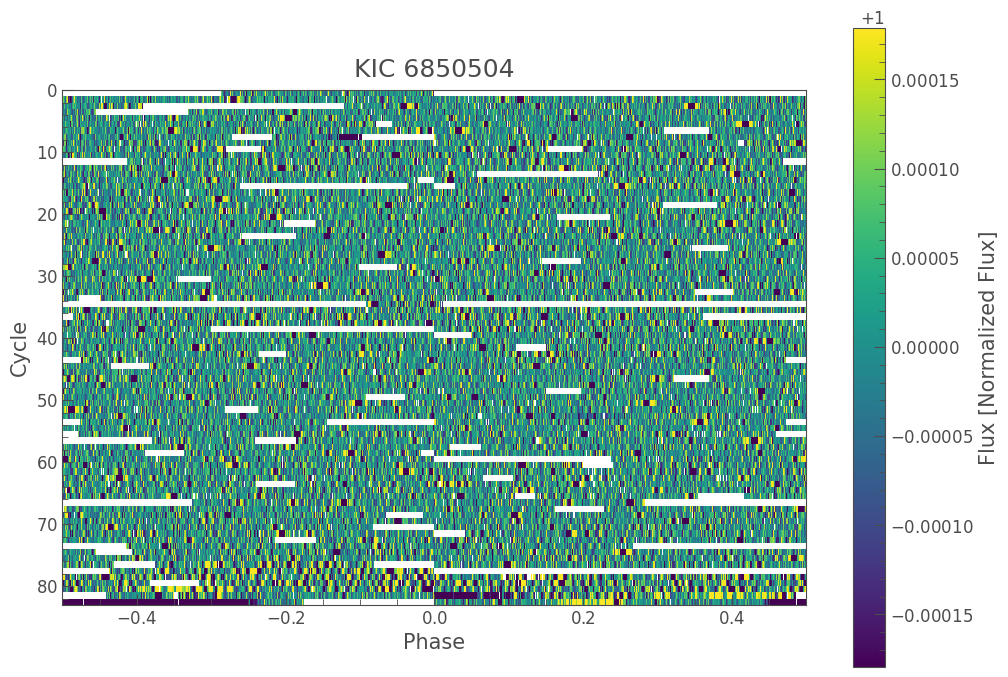

In [ ]:
folded_lc.plot_river();

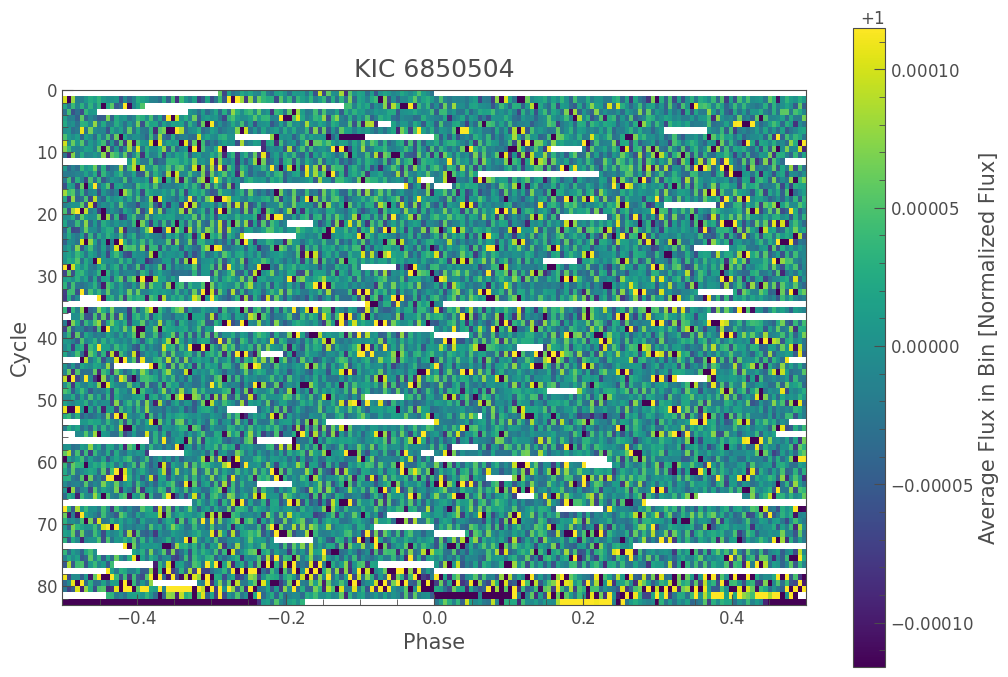

In [ ]:
folded_lc.plot_river(bin_points=5, method='median');

##Changing the Scale to Standard Deviation

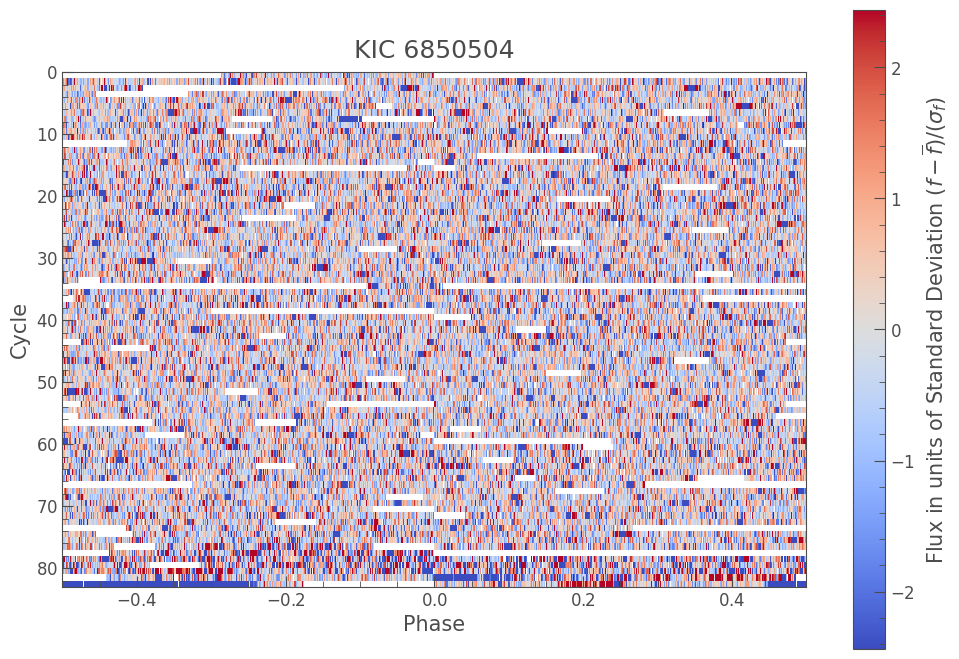

In [ ]:
folded_lc.plot_river(bin_points=1, method='sigma');

##3.2. Rotation rates and periodic signals

#2. *Creating a Periodogram from Kepler Data*

/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


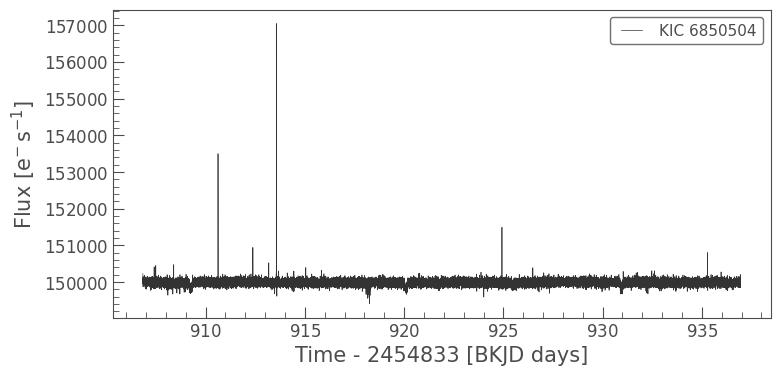

In [ ]:
lc = lk.search_lightcurve('KIC 6850504', author="Kepler", quarter=10).download()
lc.plot();

In [ ]:
pg = lc.normalize(unit='ppm').to_periodogram()
pg

LombScarglePeriodogram(ID: KIC 6850504)

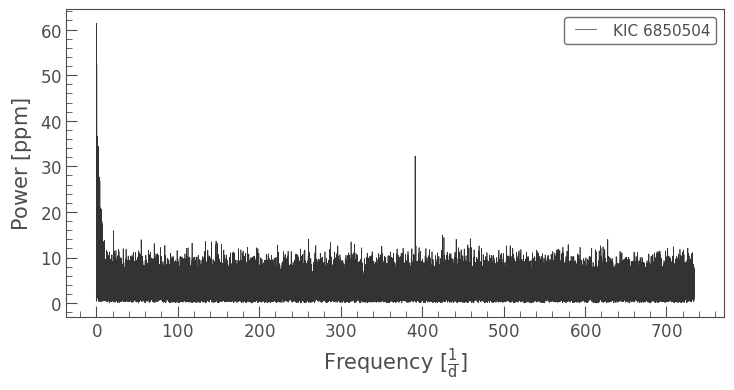

In [ ]:
pg.plot();

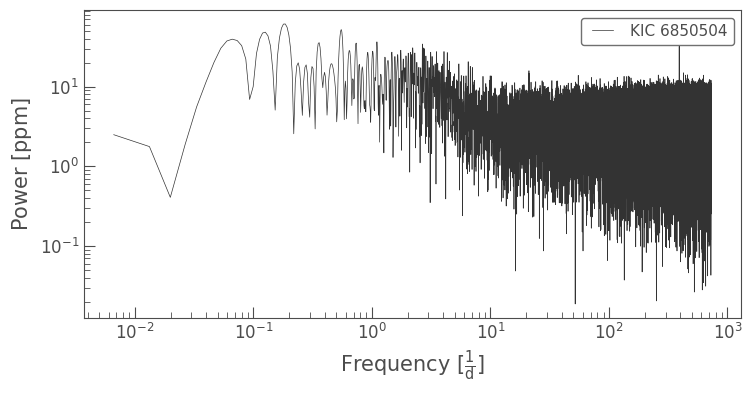

In [ ]:
pg.plot(scale='log');

##Using a Kepler Periodogram to Identify a Significant Period

In [ ]:
pg.show_properties()

lightkurve.Periodogram properties:
      Attribute          Description   Units
---------------------- --------------- -----
                nterms               1      
              targetid         6850504      
          default_view       frequency      
                 label     KIC 6850504      
             ls_method            fast      
frequency_at_max_power          0.1859 1 / d
             max_power         61.4315   ppm
               nyquist        734.0908 1 / d
   period_at_max_power          5.3784     d
             frequency array (110550,) 1 / d
                period array (110550,)     d
                 power array (110550,)   ppm
                  meta  <class 'dict'>      


In [ ]:
period = pg.period_at_max_power
period

<Quantity 5.37839307 d>

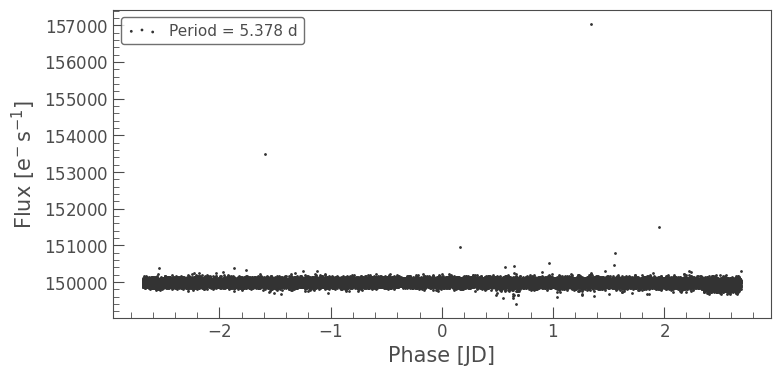

In [ ]:
lc.fold(period).scatter(label=f'Period = {period.value:.3f} d');

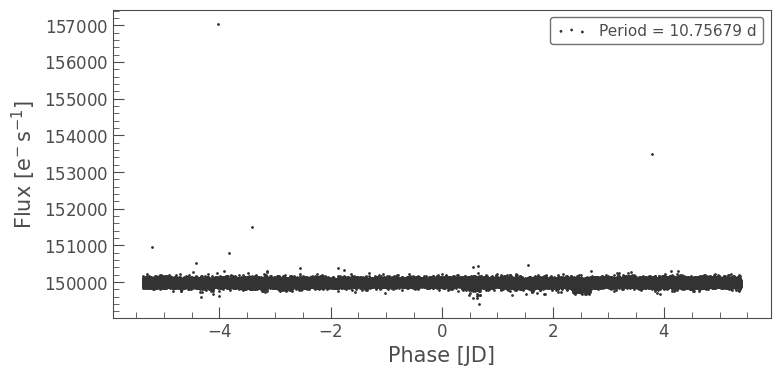

In [ ]:
lc.fold(2*period).scatter(label=fr'Period = {2*period.value:.5f} d');

#3.3Plotting the Frequency Spectrum of a Sun-Like Star

In [ ]:
search_result = lk.search_lightcurve('KIC 6850504',
                                     cadence='short',
                                     author='Kepler',
                                     quarter=(2,5,6,7))
lc = search_result.download_all().stitch()

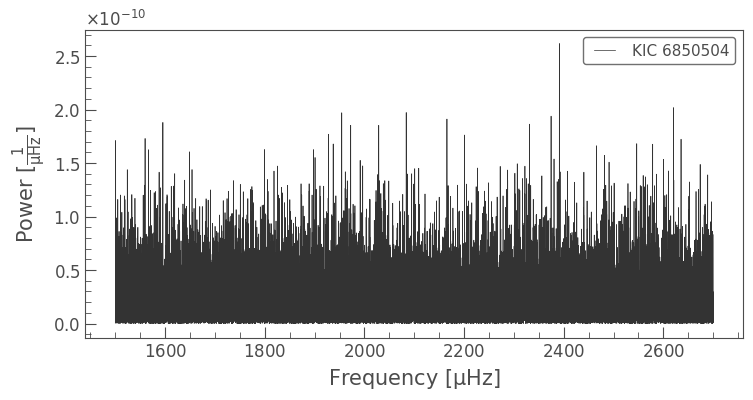

In [ ]:
pg = lc.to_periodogram(normalization='psd',
                       minimum_frequency=1500,
                       maximum_frequency=2700)
ax = pg.plot();

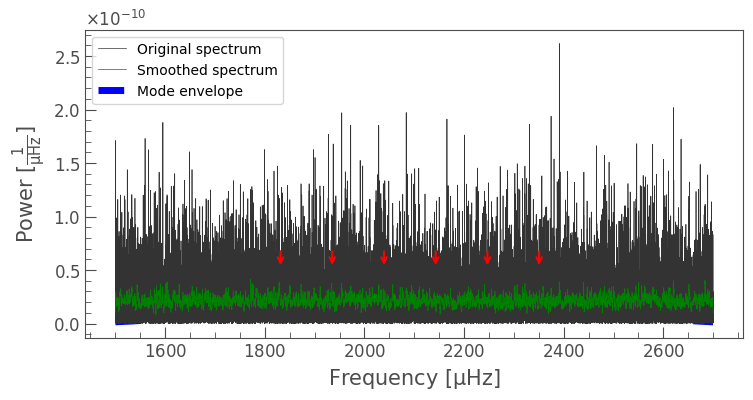

In [ ]:
# Plot a smoothed version of the power spectrum on top in green
ax = pg.plot(label='Original spectrum')
pg.smooth(filter_width=1).plot(ax=ax,
                               color='green',
                               label='Smoothed spectrum')

# Highlight the "mode envelope" using a Gaussian curve
f = pg.frequency.value
ax.plot(f, 5e-11*np.exp(-(f-2100)**2/(2*230**2)),
        lw=5, ls='--', zorder=0,
        color='blue', label='Mode envelope');

# Annotate the modes using red arrows
for i in range(6):
  ax.annotate('',
              xy=(1831.66+i*103.8, 5.2e-11),
              xytext=(1831.66+i*103.8, 7e-11),
              arrowprops=dict(arrowstyle='->',
              color='red',
              linewidth=1.5))
ax.legend();

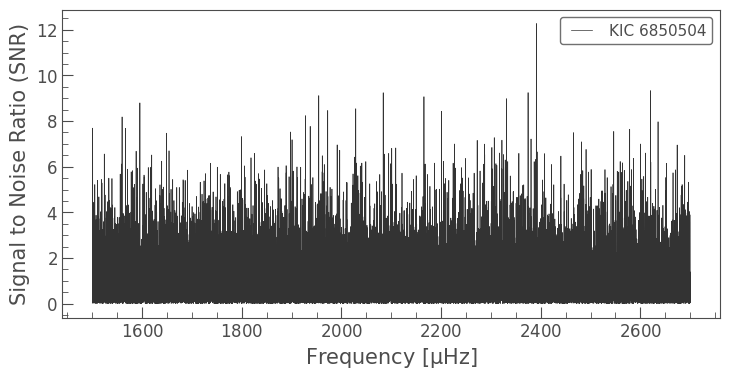

In [ ]:
snr = pg.flatten()
ax = snr.plot();

In [ ]:
seismology = snr.to_seismology()

In [ ]:
seismology.estimate_numax()

numax: 2275.00 uHz (method: ACF2D)

In [ ]:
seismology.numax.value

np.float64(2275.0)

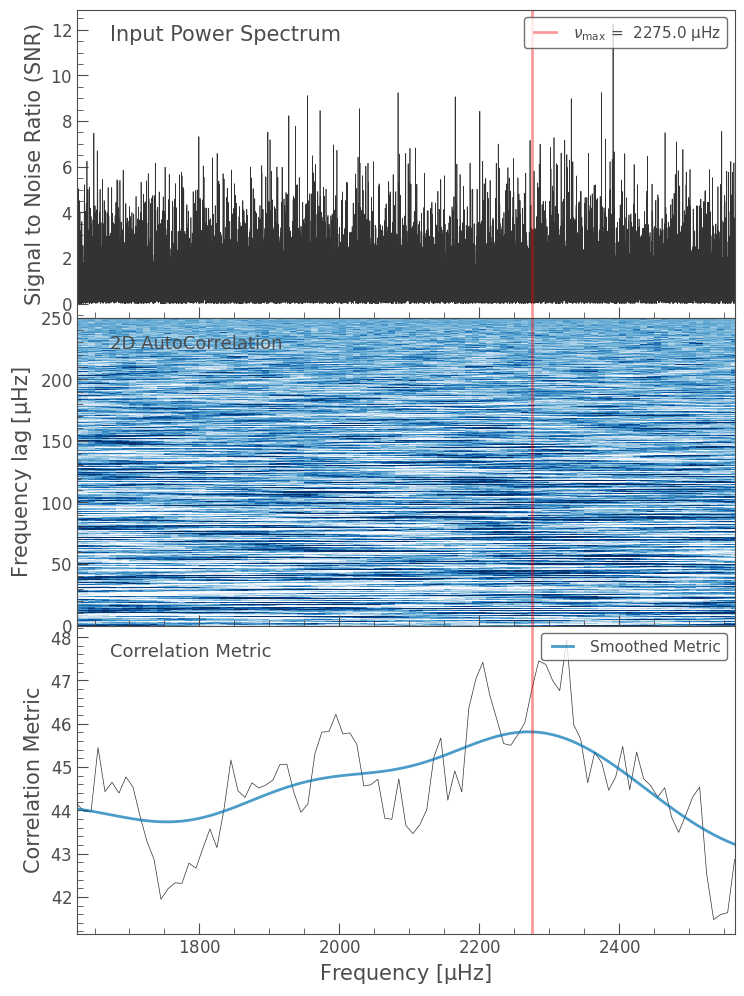

In [ ]:
seismology.diagnose_numax();

In [ ]:
seismology.estimate_deltanu()

deltanu: 123.93 uHz (method: ACF2D)

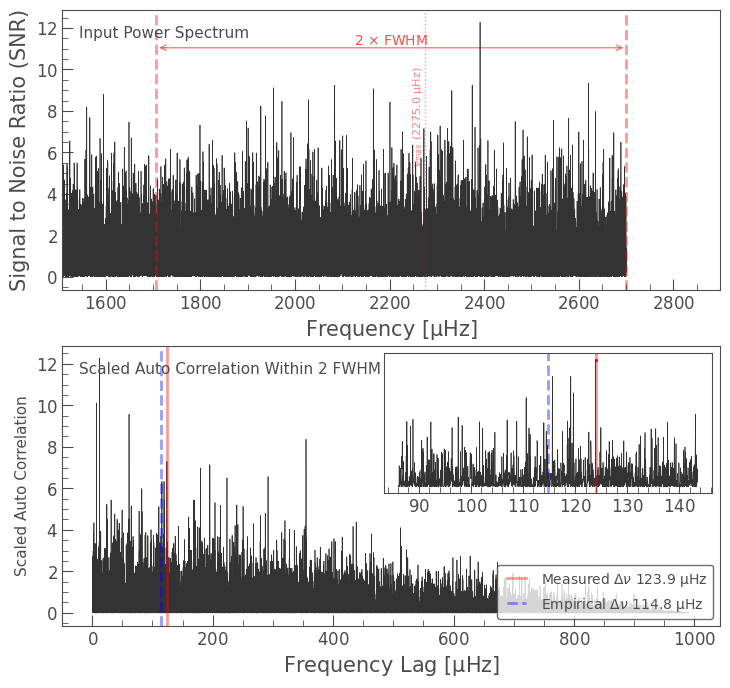

In [ ]:
seismology.diagnose_deltanu();

In [ ]:
seismology.estimate_mass()

/usr/local/lib/python3.12/dist-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


mass: 0.52 solMass (method: Uncorrected Scaling Relations)

In [ ]:
seismology.estimate_radius()

radius: 0.85 solRad (method: Uncorrected Scaling Relations)

In [ ]:
seismology.estimate_logg()

logg: 4.29 dex (method: Uncorrected Scaling Relations)

In [ ]:
seismology

Seismology(ID: KIC 6850504) - computed values:
 * numax: 2275.00 uHz (method: ACF2D)
 * deltanu: 123.93 uHz (method: ACF2D)
 * mass: 0.52 solMass (method: Uncorrected Scaling Relations)
 * radius: 0.85 solRad (method: Uncorrected Scaling Relations)
 * logg: 4.29 dex (method: Uncorrected Scaling Relations)